# MODULE - 4
## 4.1

### Importing bollinger's band dataset and making calls using Machine Learning model


In [278]:
# importing lib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
%matplotlib inline
import pickle

In [2]:
# loading the dataset with bollinger columns
nifty = pd.read_csv('nifty.csv', index_col="DATE")
nifty.index = pd.to_datetime(nifty.index)


In [3]:
# creating a function to make the call column
def callcreator(close,lower,upper,middle):
    Call = []
    for i in range(len(close)):
        if close[i]<=lower[i]:
            Call.append('Buy')
        elif lower[i]<close[i]<middle[i]:
            Call.append('Hold Buy')
        elif middle[i]<close[i]<upper[i]:
            Call.append('Hold Short')
        elif close[i]>=upper[i]:
            Call.append('Short')
        else :
            Call.append('Nil')
    nifty['Call'] = Call
    return nifty


            
        
        

        


In [4]:
# runing the function
callcreator(nifty['NIFY'],nifty['Lower'],nifty['Upper'],nifty['AVG(14)'])
nifty.tail(15)

,NIFY,SMA(21),SMA(34),BUY,SELL,Buy_Ind,Sell_Ind,AVG(14),Upper,Lower,Call
DATE,,,,,,,,,,,
2019-04-18,11752.80,11600.392857,11419.064706,1,0,0,0,11660.382143,11781.004316,11539.759970,Hold Short
2019-04-22,11594.45,11603.347619,11442.235294,1,0,0,0,11658.278571,11782.611504,11533.945639,Hold Buy
2019-04-23,11575.95,11605.961905,11465.277941,1,0,0,0,11651.621429,11783.215283,11520.027574,Hold Buy
2019-04-24,11726.15,11618.783333,11490.650000,1,0,0,0,11652.546429,11786.171245,11518.921612,Hold Short
2019-04-25,11641.80,11632.476190,11509.895588,1,0,0,0,11652.392857,11786.065165,11518.720549,Hold Buy
2019-04-26,11754.65,11645.400000,11530.532353,1,0,0,0,11663.582143,11803.710730,11523.453556,Hold Short
2019-04-30,11748.15,11659.833333,11550.825000,1,0,0,0,11669.453571,11816.716343,11522.190800,Hold Short
2019-05-02,11724.75,11667.202381,11571.100000,1,0,0,0,11678.042857,11822.995284,11533.090431,Hold Short
2019-05-03,11712.25,11671.409524,11587.105882,1,0,0,0,11680.921429,11826.949264,11534.893593,Hold Short


### Training classification model


In [5]:
#creating a new dataframe and cleaning the data
df = pd.DataFrame(nifty)
df = df.drop(columns= ['SMA(21)','SMA(34)','Buy_Ind',"Sell_Ind",'BUY',"SELL"],axis=1)
df = df.dropna()


In [1]:
# setting up random seed 
np.random.seed(0)
# spliting into features and targets
X = df.drop('Call',axis=1)
y = df['Call']

# splitting into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
y_test = pd.DataFrame(y_test)
y_train= pd.DataFrame(y_train)

# # label encoding 
lbc = LabelEncoder()

y_test_transformed = lbc.fit_transform(y_test).reshape(-1,1)
y_train_transformed = lbc.fit_transform(y_train).reshape(-1,1)

# Normalizing the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled.ravel()


NameError: name 'np' is not defined

### Linear SVC Classifier

In [7]:
# instanciating the classifer
svc = LinearSVC()

# fitting the model
svc.fit(X_train_scaled,y_train_transformed.ravel())

# checking the accuracy of the model
svc.score(X_test_scaled,y_test_transformed.ravel())


0.8689655172413793

### Random Forest Classifier

 1) With scaled feature 
 

In [8]:

# instansiating classifer
cls = RandomForestClassifier()

# fitting model
cls.fit(X_train_scaled,y_train_transformed.ravel())

# checking the accuracy of the model
cls.score(X_test_scaled,y_test_transformed.ravel())






0.7724137931034483

2) Without scaling 


In [9]:
cls.fit(X_train,y_train_transformed.ravel())
cls.score(X_test,y_test_transformed.ravel())

0.7931034482758621

### DecisionTree Classifier


In [10]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train_transformed.ravel())
dtc.score(X_test,y_test_transformed.ravel())

0.7931034482758621

### KNN Classifier 

In [11]:
knn =  KNeighborsClassifier()
knn.fit(X_train_scaled,y_train_transformed.ravel())
knn.score(X_test_scaled,y_test_transformed.ravel())

0.8620689655172413

### Gaussian Naive Bayes

In [12]:
gnb = GaussianNB()
gnb.fit(X_train_scaled,y_train_transformed.ravel())
gnb.score(X_test_scaled,y_test_transformed.ravel())

0.5724137931034483

 ### NOTE:
Since highest accuracy was attained using Linear SVC Classifier and K-Nearest Neighbour Classifier , both are picked as the appropricate models for predictions.
 

In [13]:
# Saving the models
pickle.dump(svc,open('svc.pkl','wb'))
pickle.dump(knn,open ('knn.pkl','wb'))

### PREDICTING  ANOTHER STOCK DATA USING THE MODEL TRAINED 

In [48]:
# loading the infosys dataset and addin bullinger's columns
info = pd.read_csv('INFY.csv')
info = info[info['Series']== 'EQ']
info_new = pd.DataFrame()
info_new['Close'] = info['Close Price']
info_new['Date'] = info['Date']
info_new = info_new.set_index('Date')
info_new.index = pd.to_datetime(info_new.index)
info_new['AVG(14)'] = info_new['Close'].rolling(14).mean()
info_new['Upper'] = info_new['AVG(14)']+2*(info_new['Close'].rolling(14).std())
info_new['Lower'] = info_new['AVG(14)']-2*(info_new['Close'].rolling(14).std())
info_new

,Close,AVG(14),Upper,Lower
Date,,,,
2017-05-15,951.55,NaN,NaN,NaN
2017-05-16,955.00,NaN,NaN,NaN
2017-05-17,952.80,NaN,NaN,NaN
2017-05-18,961.75,NaN,NaN,NaN
2017-05-19,957.95,NaN,NaN,NaN
...,...,...,...,...
2019-05-07,724.55,729.810714,750.387444,709.233984
2019-05-08,719.35,727.782143,746.230016,709.334270
2019-05-09,721.05,727.321429,746.118512,708.524346


In [52]:
# droping unfilled rows
info_new = info_new.dropna()

In [65]:
# scaling the columns
scaled_info = scaler.fit_transform(info_new)
scaled_info

array([[ 0.04763064,  0.02098618, -0.05951907,  0.10590883],
       [ 0.03891558,  0.0269055 , -0.06064576,  0.11856161],
       [-0.00890554,  0.02814558, -0.06161026,  0.12201328],
       ...,
       [-1.07124947, -1.09637571, -1.09274324, -0.912606  ],
       [-1.09002038, -1.0987732 , -1.09173521, -0.91833731],
       [-1.07728298, -1.09789688, -1.09242226, -0.91589211]])

In [66]:
# loading the trained model
svc = pickle.load(open('svc.pkl','rb'))
y_pred = svc.predict(scaled_info)


In [98]:
# filling the call column using the predicted values
info_new['Call']= lbc.inverse_transform(y_pred)
info_new

<ipython-input-98-d8df538ee84f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_new['Call']= lbc.inverse_transform(y_pred)


,Close,AVG(14),Upper,Lower,Call
Date,,,,,
2017-06-01,971.40,968.671429,1000.634068,936.708789,Hold Short
2017-06-02,969.45,969.950000,1000.356528,939.543472,Hold Short
2017-06-05,958.75,970.217857,1000.118940,940.316774,Hold Short
2017-06-06,979.35,972.114286,1000.590495,943.638076,Hold Short
2017-06-07,961.30,972.082143,1000.609717,943.554569,Hold Short
...,...,...,...,...,...
2019-05-07,724.55,729.810714,750.387444,709.233984,Hold Short
2019-05-08,719.35,727.782143,746.230016,709.334270,Hold Short
2019-05-09,721.05,727.321429,746.118512,708.524346,Hold Short


# 4.2

In [164]:
# pre processing the dataset 
info = pd.read_csv('INFY.csv', index_col = 'Date')
info = info[info['Series']== 'EQ']
info['open_close_pct'] = ( info['Close Price']  - info['Open Price'] ) / info['Close Price']*100
info['high_low_pct'] =   ( info['High Price']  - info['Low Price'] ) / info['Low Price']*100
info['pct'] = info['Close Price'].pct_change()
info ['Rolling_mean_pct'] = info['pct'].rolling(5).mean()
info ['Rolling_std_pct'] =  info['pct'].rolling(5).std()

Define 4 new columns , whose values are:

 * % change between Open and Close price for the day
 * % change between Low and High price for the day
 * 5 day rolling mean of the day to day % change in Close Price
 * 5 day rolling std of the day to day % change in Close Price

In [165]:
# creating the new columns and droping the null vlaue rows 
info['open_close_pct'] = ( info['Close Price']  - info['Open Price'] ) / info['Close Price']*100
info['high_low_pct'] =   ( info['High Price']  - info['Low Price'] ) / info['Low Price']*100
info['pct'] = info['Close Price'].pct_change()
info ['Rolling_mean_pct'] = info['pct'].rolling(5).mean()
info ['Rolling_std_pct'] =  info['pct'].rolling(5).std()
info= info.dropna()

In [166]:
info.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,open_close_pct,high_low_pct,pct,Rolling_mean_pct,Rolling_std_pct
Date,,,,,,,,,,,,,,,,,,,
22-May-2017,INFY,EQ,957.95,958.40,966.9,956.55,960.00,961.45,962.29,2751526,2.647755e+09,99616,2034031,73.92,0.317229,1.082013,0.003654,0.002084,0.005337
23-May-2017,INFY,EQ,961.45,964.65,967.0,954.10,957.50,957.30,960.16,2019991,1.939515e+09,80122,1436389,71.11,-0.767784,1.352060,-0.004316,0.000495,0.005914
24-May-2017,INFY,EQ,957.30,960.00,965.5,949.60,957.00,954.80,958.37,2818143,2.700827e+09,56898,1913750,67.91,-0.544617,1.674389,-0.002612,0.000434,0.005952
25-May-2017,INFY,EQ,954.80,961.00,986.6,961.00,981.00,983.30,978.16,5219257,5.105250e+09,76160,4108984,78.73,2.267873,2.663892,0.029849,0.004525,0.014517
26-May-2017,INFY,EQ,983.30,987.00,1000.0,980.60,996.05,995.70,994.06,2494002,2.479194e+09,63671,1477643,59.25,0.873757,1.978381,0.012611,0.007837,0.013979


In [167]:
# adding the Action column
info['Action'] = np.where(info['Close Price'].shift(-1) > info['Close Price'],1,-1)
info

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,open_close_pct,high_low_pct,pct,Rolling_mean_pct,Rolling_std_pct,Action
Date,,,,,,,,,,,,,,,,,,,,
22-May-2017,INFY,EQ,957.95,958.40,966.90,956.55,960.00,961.45,962.29,2751526,2.647755e+09,99616,2034031,73.92,0.317229,1.082013,0.003654,0.002084,0.005337,-1
23-May-2017,INFY,EQ,961.45,964.65,967.00,954.10,957.50,957.30,960.16,2019991,1.939515e+09,80122,1436389,71.11,-0.767784,1.352060,-0.004316,0.000495,0.005914,-1
24-May-2017,INFY,EQ,957.30,960.00,965.50,949.60,957.00,954.80,958.37,2818143,2.700827e+09,56898,1913750,67.91,-0.544617,1.674389,-0.002612,0.000434,0.005952,1
25-May-2017,INFY,EQ,954.80,961.00,986.60,961.00,981.00,983.30,978.16,5219257,5.105250e+09,76160,4108984,78.73,2.267873,2.663892,0.029849,0.004525,0.014517,1
26-May-2017,INFY,EQ,983.30,987.00,1000.00,980.60,996.05,995.70,994.06,2494002,2.479194e+09,63671,1477643,59.25,0.873757,1.978381,0.012611,0.007837,0.013979,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
07-May-2019,INFY,EQ,718.40,720.40,727.90,718.70,724.40,724.55,724.51,5747536,4.164127e+09,104342,3690425,64.21,0.572769,1.280089,0.008561,-0.003548,0.017567,-1
08-May-2019,INFY,EQ,724.55,721.00,726.00,716.50,718.95,719.35,721.65,6247642,4.508603e+09,162077,3950857,63.24,-0.229374,1.325890,-0.007177,-0.008601,0.012764,1
09-May-2019,INFY,EQ,719.35,719.15,730.30,715.80,722.00,721.05,724.48,7396525,5.358635e+09,242225,4808832,65.01,0.263505,2.025706,0.002363,-0.002658,0.007806,-1


### Training the model 

In [233]:
# spliting target and features 
X = info [['open_close_pct','high_low_pct','Rolling_mean_pct','Rolling_std_pct']]
y = info ['Action']

# standardizing the features
X = scaler.fit_transform(X)

# for making results reproducible
np.random.seed(4)

# spliting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2)

# fiting  random forest classifer model on train sets
cls.fit(X_train,y_train)

#checking model accuracy 
cls.score(X_test,y_test)

0.5306122448979592

### Improving and checking accuracy of model 

In [253]:
np.random.seed(4)
for i in range (10,100,10):
    print(f"n_estimator: {i}" )
    cls= RandomForestClassifier(n_estimators= i)
    cls.fit(X_train,y_train)
    print (f"accuracy of model for n_esmimator as {i}: {cls.score(X_test,y_test)*100:.2f}%")

n_estimator: 10
accuracy of model for n_esmimator as 10: 47.96%
n_estimator: 20
accuracy of model for n_esmimator as 20: 51.02%
n_estimator: 30
accuracy of model for n_esmimator as 30: 54.08%
n_estimator: 40
accuracy of model for n_esmimator as 40: 54.08%
n_estimator: 50
accuracy of model for n_esmimator as 50: 50.00%
n_estimator: 60
accuracy of model for n_esmimator as 60: 52.04%
n_estimator: 70
accuracy of model for n_esmimator as 70: 52.04%
n_estimator: 80
accuracy of model for n_esmimator as 80: 54.08%
n_estimator: 90
accuracy of model for n_esmimator as 90: 57.14%


In [254]:
# after hyperparameter tuning 
cls.score(X_test,y_test)

0.5714285714285714

In [279]:
Action_pred = cls.predict(X)
accuracy_score(y,Action_pred)

0.9141104294478528

### Ploting net cumulative returns following the model

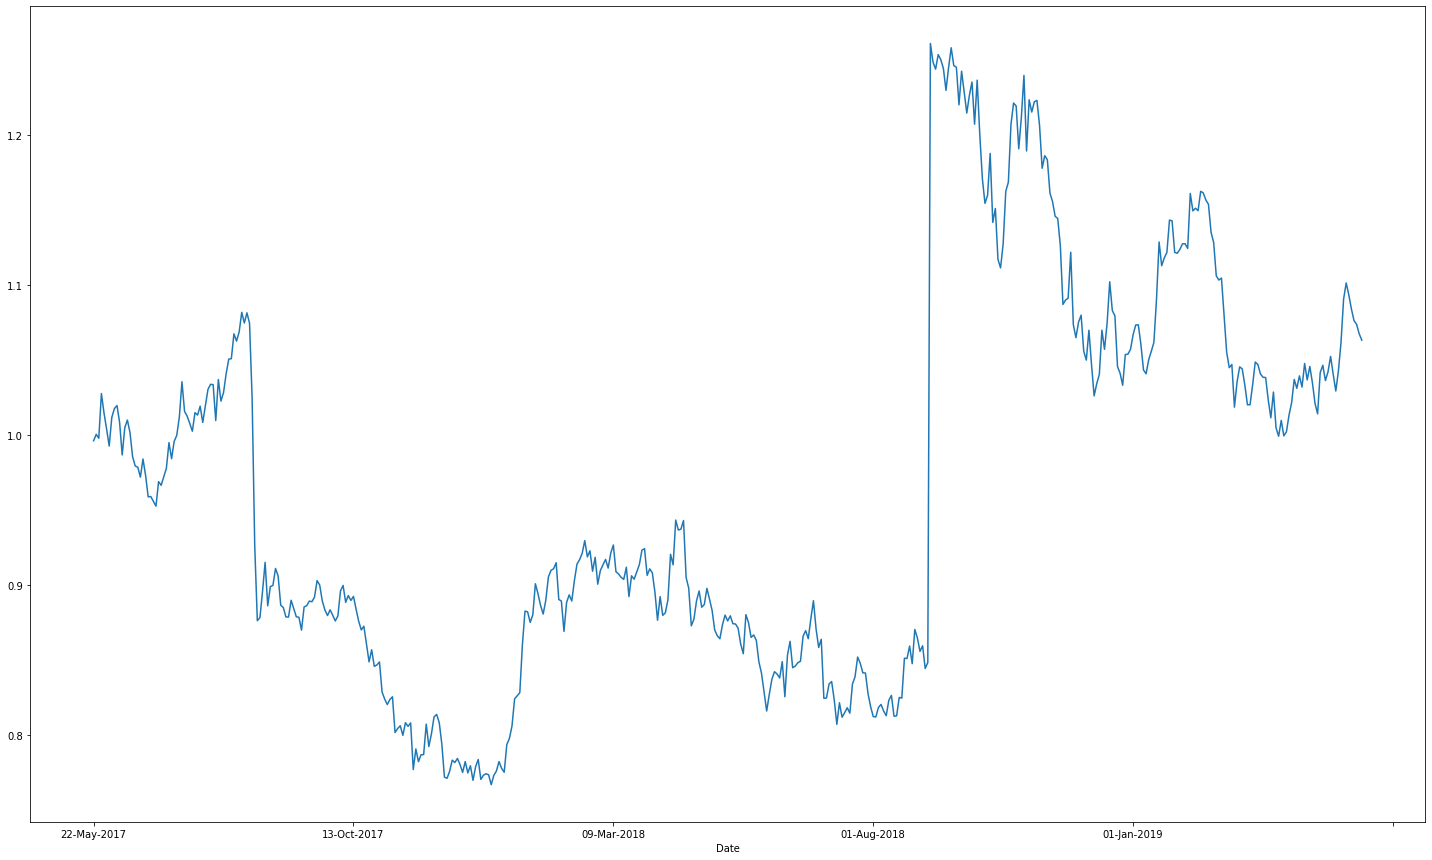

In [281]:

plt.figure(figsize=(25, 15))
cumulative_returns = ( 1 + (info['pct'] * Action_pred) ).dropna().cumprod()
cumulative_returns.plot()